In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.datasets import boston_housing
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense

In [40]:
df = pd.read_csv("HousingData.csv",na_values='NA')
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


In [41]:
df.fillna(df.mean(numeric_only=True),inplace=True)
df.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [42]:
x = df.loc[:, df.columns != 'MEDV']
y = df.loc[:, df.columns == 'MEDV']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [43]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [44]:
model = Sequential([
    Input(shape=(x_train.shape[1],)),
    Dense(128,activation='relu'),
    Dense(64,activation='relu'),
    Dense(1,activation='linear')
])

In [45]:
model.compile(optimizer='adam',loss='mse',metrics=['mae'])
history = model.fit(x_train_scaled,y_train,epochs=50,validation_split=0.2,verbose=0)

In [46]:
test_mse, test_mae = model.evaluate(x_test_scaled, y_test)
print('Mean squared error on test data: ', test_mse)
print('Mean absolute error on test data: ', test_mae)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 11.0612 - mae: 2.3458
Mean squared error on test data:  14.987144470214844
Mean absolute error on test data:  2.4692537784576416


In [51]:
predictions = model.predict(x_test_scaled)
for i in range(5):
    print(f"Predicted: {predictions[i][0]:.2f} Actual: {y_test.values[i]}")

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Predicted: 27.41 Actual: [23.6]
Predicted: 38.36 Actual: [32.4]
Predicted: 19.85 Actual: [13.6]
Predicted: 28.08 Actual: [22.8]
Predicted: 15.52 Actual: [16.1]


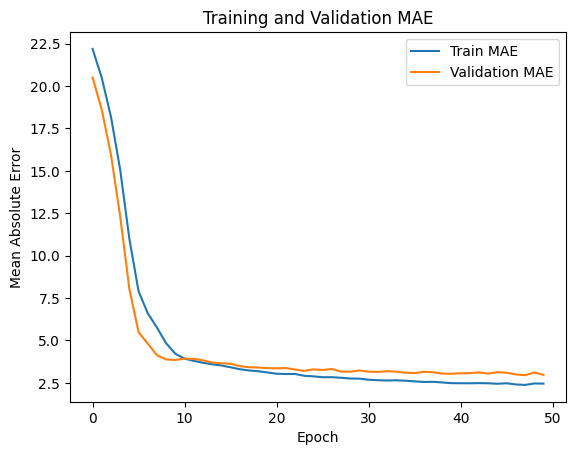

In [52]:
plt.plot(history.history['mae'], label='Train MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.xlabel('Epoch')
plt.ylabel('Mean Absolute Error')
plt.title('Training and Validation MAE')
plt.legend()
plt.show()